# Proteomics and Phosphoproteomics: EDA and Analysis
This notebook performs data cleaning, normalization, exploratory data analysis (EDA), and prepares data for downstream multi-omics integration.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load datasets
proteo_df = pd.read_csv("data_output/proteo_filtered.csv", index_col=0)
phospho_df = pd.read_csv("data_output/phospho_filtered.csv", index_col=0)

## Step 1: Inspect Missingness and Filter High-Missing Features

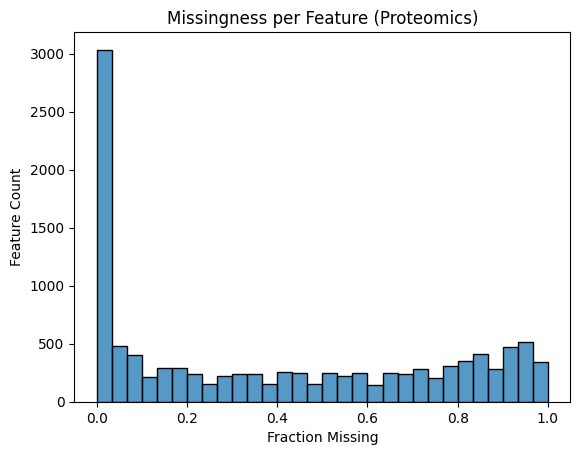

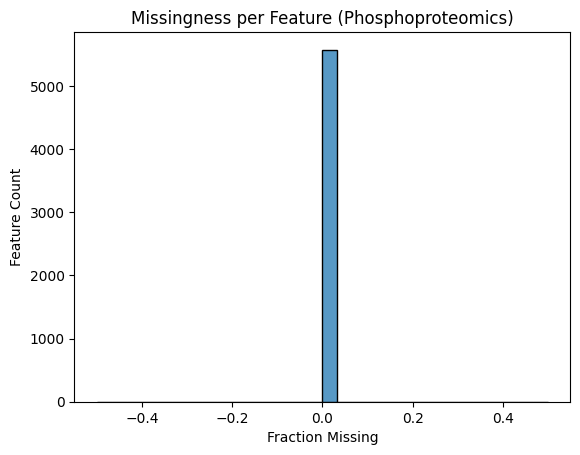

In [4]:
# Plot missing values per feature
def plot_missingness(df, title):
    missing = df.isna().mean(axis=1)
    sns.histplot(missing, bins=30)
    plt.title(f'Missingness per Feature ({title})')
    plt.xlabel('Fraction Missing')
    plt.ylabel('Feature Count')
    plt.show()

plot_missingness(proteo_df, 'Proteomics')
plot_missingness(phospho_df, 'Phosphoproteomics')

# Filter features with >50% missing values
proteo_df = proteo_df[proteo_df.isna().mean(axis=1) <= 0.5]
phospho_df = phospho_df[phospho_df.isna().mean(axis=1) <= 0.5]

## Step 2: Impute Missing Values

In [5]:
# Median imputation (simplified example)
proteo_df = proteo_df.apply(lambda x: x.fillna(x.median()), axis=1)
phospho_df = phospho_df.apply(lambda x: x.fillna(x.median()), axis=1)

## Step 3: Log2 Transformation and Normalization

In [6]:
# Add small constant to avoid log(0)
log_proteo = np.log2(proteo_df + 1)
log_phospho = np.log2(phospho_df + 1)

## Step 4: Data Visualization - Histogram, Boxplot

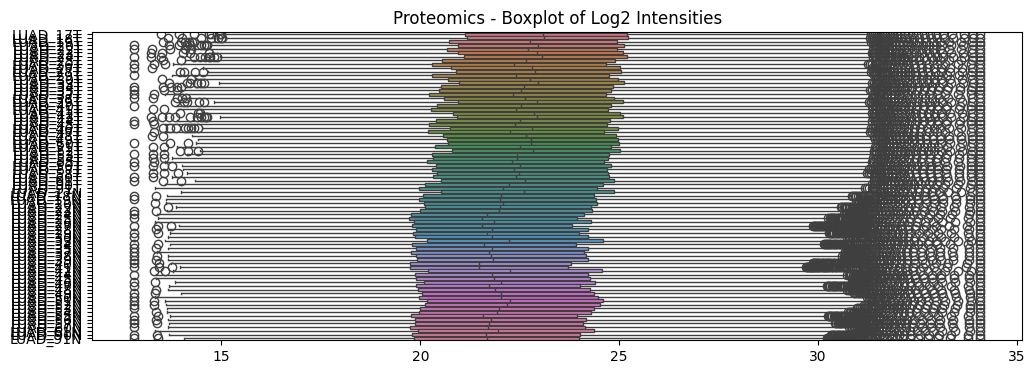

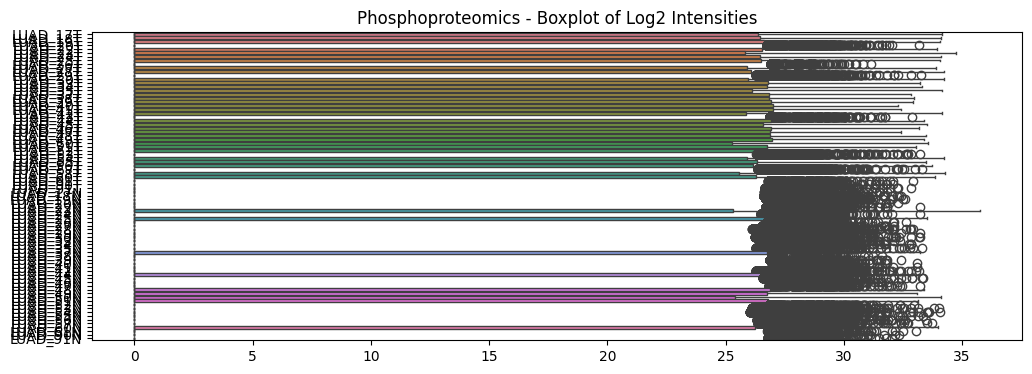

In [7]:
def boxplot_distribution(df, title):
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=df, orient='h')
    plt.title(f'{title} - Boxplot of Log2 Intensities')
    plt.show()

boxplot_distribution(log_proteo, 'Proteomics')
boxplot_distribution(log_phospho, 'Phosphoproteomics')

## Step 5: PCA Analysis

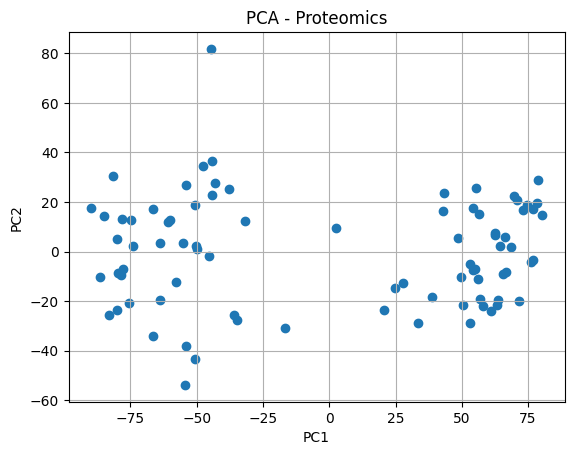

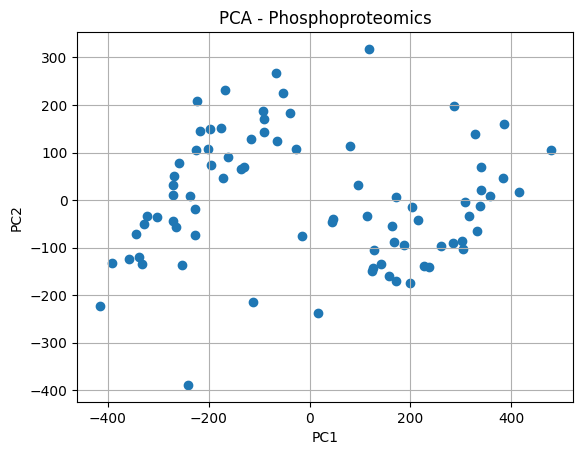

In [8]:
def pca_plot(df, title):
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(df.T)
    plt.figure()
    plt.scatter(pcs[:, 0], pcs[:, 1])
    plt.title(f'PCA - {title}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()

pca_plot(log_proteo, 'Proteomics')
pca_plot(log_phospho, 'Phosphoproteomics')

## Step 6: Save Cleaned Data for Downstream Analysis

In [9]:
log_proteo.to_csv("processed_log2_proteomics.csv")
log_phospho.to_csv("processed_log2_phosphoproteomics.csv")